# 线性回归 Linear Regression
## 算法实现 implementation of algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### 数据集 Dataset

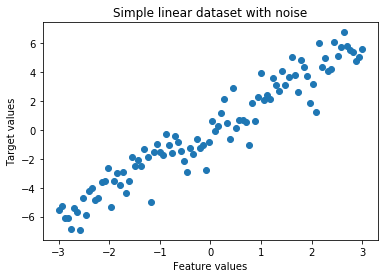

In [2]:
X = np.linspace(-3, 3, 100)
y = X * 2 + np.random.randn(100)
X_train, X_test, y_train, y_test = train_test_split(X, y)

plt.scatter(X, y)
plt.title("Simple linear dataset with noise")
plt.xlabel("Feature values")
plt.ylabel("Target values")
plt.show()

In [3]:
class LinearRegression():
    def __init__(self):
        self.coef = None
        self.intercept = None
        self.theta = None

    def fit(self, X_train, y_train):
        '''
        正规方程
        '''
        if X_train.ndim == 1:
            X_train.shape = (-1,1)
        X_b = np.hstack([np.ones((len(X_train), 1)), X_train])
        self.theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)
        self.intercept = self.theta[0]
        self.coef = self.theta[1:]
        return self.coef, self.intercept
    
    def predict(self, X_test):
        if X_test.ndim == 1:
            X_test.shape = (-1,1)
        X_b = np.hstack([np.ones((len(X_test), 1)), X_test])
        return X_b.dot(self.theta)
    
    def mean_squared_error(self, y_true, y_predict):
        return np.sum((y_true - y_predict)**2) / len(y_true)
    
    def score(self, X_test, y):
        y_p = self.predict(X_test)
        return 1 - self.mean_squared_error(y, y_p)/np.var(y)

In [4]:
reg = LinearRegression()
slope, intercept = reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.92662746009336

### 预测可视化 Visualize Result

In [5]:
def plot_2d_hyperplane(X, y, slope, intercept):
    x_hyperplane = np.linspace(-3,3,10)
    y_hyperplane = slope * x_hyperplane + intercept
    plt.scatter(X, y)
    plt.plot(x_hyperplane, y_hyperplane, 'r-')
    plt.title("Dataset and linear function")
    plt.xlabel("Feature values")
    plt.ylabel("Target values")
    plt.show()

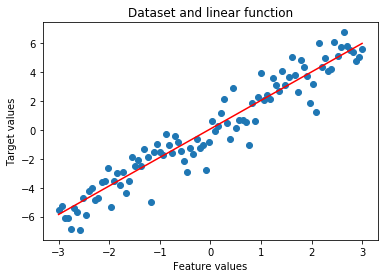

In [6]:
plot_2d_hyperplane(X, y, slope, intercept)

## scikit-learn

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
l_reg = LinearRegression()
l_reg.fit(X_train, y_train)
l_reg.score(X_test, y_test)

0.9266274600933598

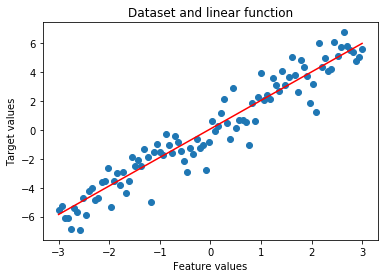

In [9]:
plot_2d_hyperplane(X, y, l_reg.coef_, l_reg.intercept_)